# Sieci konwolucyjne

Zadanie dla Państwa na te ćwiczenia to implementacja funkcji konwolucji oraz max pooling dla obrazów.

In [84]:
# ploting
# Max Pooling Test
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
# imports
import torch

%matplotlib inline

Files already downloaded and verified


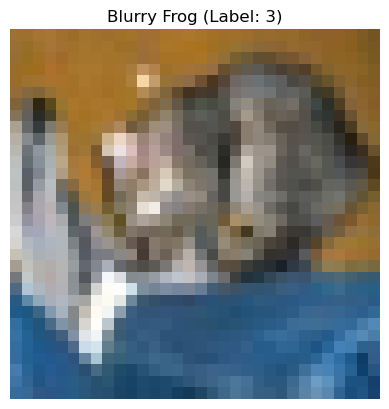

In [86]:


import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Pobierz zestaw danych CIFAR10
transform = transforms.Compose([transforms.ToTensor()])
cifar10 = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Pobierz pierwszy obrazek i etykietę z zestawu (np. żabę)
np_image, label = cifar10[0]  # Pierwszy obrazek

# Konwersja obrazu do NumPy
np_image = np_image.numpy()

# Wyświetl obraz (po transpozycji)
plt.imshow(np_image.transpose(1, 2, 0))  # Zmiana z (C, H, W) na (H, W, C)
plt.title(f"Blurry Frog (Label: {label})")
plt.axis('off')
plt.show()


In [87]:
# data loading
# to nie działa cifar_sample = np.load("resources/cifar_sample.npy")
# get a first random image
np_image = cifar_sample[0]
# this should plot a blurry frog
plt.imshow(np_image.transpose(1, 2, 0))

AttributeError: 'tuple' object has no attribute 'transpose'

### Wzory na rozmiary
**Pytanie 1**: Jaki będzie rozmiar obrazka na wyjściu konwolucji/poolingu przy parametrach poniżej.  
**Uwaga**: zarówno we wzorach jak i w kodzie używana jest torchowa konwencja *channel first*.

Stride: $ \hspace{95px} S $  
Padding: $ \hspace{80px} P $  
Obrazek wejściowy: $ \hspace{12px} C_i \times H_i \times W_i$  
Filtry: $ \hspace{100px} K \times C_f \times F \times F $  

Gdzie: $C_i$ to liczba kanału obrazu wejściowego, $H_i, W_i$ to odpowiednio wysokość i szerokość obrazu wejściowego. $K$ to liczba filtrów, $C_f$ liczba kanałów w każdym filtrze, $F$ to zarówno wysokość jak i szerokość filtra (rozważamy tylko filtry kwadratowe).

Obrazek wyjściowy: $ \hspace{15px} C_o \times H_o \times W_o $  


$ \hspace{140px} C_o = \text{???} $  

$ \hspace{140px} H_o = \text{???} $  

$ \hspace{140px} W_o = \text{???} $  

**Pytanie 2**: Ile wag (floatów) ma taka warstwa konwolucyja?   


### Wizualna pomoc do konwolucji
[Źródło](http://cs231n.github.io/convolutional-networks/)

<img src="resources/cnn.gif"></img>

### Zadanie 1:  Konwolucja (5 pkt.)
Zadaniem jest zaimplementowanie funkcji konwolucji i poolingu dla obrazka 2D. Implementacja nie musi być optymalna pod względem złożoności czasowej (tzn. można/zaleca się używać pętli). 

Warunkiem zaliczenia zadania jest przejście komórek testowych dla konwolucji i poolingu. W razie problemów polecam zacząć od poolingu, który jest podobny do konwolucji, ale mniej skomplikowany.

In [91]:
def convolution(image: torch.tensor, 
                filters: torch.tensor, 
                bias: torch.tensor, 
                stride: int = 1, 
                padding: int = 1):
    """
    :param image: torch.Tensor 
        Input image of shape (C, H, W)
    :param filters: torch.Tensor 
        Filters to use in convolution of shape (K, C, F, F)
    :param bias: torch.Tensor 
        Bias vector of shape (K,)
    :param stride: int
        Stride to use in convolution
    :param padding: int
       Zero-padding to add on all sides of the image 
    """
    # get image dimensions
    img_channels, img_height, img_width = image.shape 
    n_filters, filter_channels, filter_size, filter_size = filters.shape 
    # calculate the dimensions of the output image
    out_height = ???
    out_width = ???
    out_channels = ???
    
    # your code here
                
    return ???

SyntaxError: invalid syntax (3791476044.py, line 22)

In [93]:
import torch

def convolution(image: torch.tensor, 
                filters: torch.tensor, 
                bias: torch.tensor, 
                stride: int = 1, 
                padding: int = 1):
    """
    :param image: torch.Tensor 
        Input image of shape (C, H, W)
    :param filters: torch.Tensor 
        Filters to use in convolution of shape (K, C, F, F)
    :param bias: torch.Tensor 
        Bias vector of shape (K,)
    :param stride: int
        Stride to use in convolution
    :param padding: int
       Zero-padding to add on all sides of the image 
    """
    # Rozmiary obrazu i filtrów
    C_in, H_in, W_in = image.shape
    K, C_f, F, _ = filters.shape

    # Sprawdzenie poprawności wymiarów
    assert C_in == C_f, "Liczba kanałów filtra musi być równa liczbie kanałów obrazu"

    # Dodawanie paddingu
    if padding > 0:
        image = torch.nn.functional.pad(image, (padding, padding, padding, padding))

    # Rozmiar obrazu wyjściowego
    H_out = (H_in + 2 * padding - F) // stride + 1
    W_out = (W_in + 2 * padding - F) // stride + 1

    # Inicjalizacja obrazu wyjściowego
    output = torch.zeros((K, H_out, W_out))

    # Operacja konwolucji
    for k in range(K):  # Dla każdego filtra
        for i in range(H_out):
            for j in range(W_out):
                # Wycinamy fragment obrazu
                h_start, w_start = i * stride, j * stride
                h_end, w_end = h_start + F, w_start + F
                patch = image[:, h_start:h_end, w_start:w_end]
                
                # Mnożenie i sumowanie
                output[k, i, j] = (patch * filters[k]).sum() + bias[k]
                
    return output


In [95]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import torchvision
import torchvision.transforms as transforms

# Pobierz dane CIFAR10
transform = transforms.Compose([transforms.ToTensor()])
cifar10 = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Pobierz pierwszy obrazek i etykietę
np_image, label = cifar10[0]

# Sprawdź typ i kształt np_image
print(f"Typ np_image: {type(np_image)}")
print(f"Kształt np_image: {np_image.shape}")

# np_image jest już tensorem, więc nie musisz go ponownie konwertować
image = np_image  # np_image to już tensor PyTorch

# Przygotowanie parametrów do testu
paddings = [0, 1, 2, 3]
strides = [1, 2, 3, 4]
filters = [
    (torch.randn((2, 3, 3, 3)), torch.randn((2))),
    (torch.randn((2, 3, 5, 5)), torch.randn((2))),
    (torch.randn((5, 3, 1, 1)), torch.randn((5))),
]

# Testowanie wszystkich kombinacji
for (filt, bias), stride, padding in product(filters, strides, paddings):
    # Twoja implementacja konwolucji
    out = convolution(image, filt, bias, stride=stride, padding=padding)
    
    # Równoważna operacja w PyTorch
    out_torch = torch.conv2d(
        input=image.unsqueeze(0), weight=filt, bias=bias, padding=padding, stride=stride
    )
    
    # Porównanie wyników
    assert out_torch.squeeze().shape == out.shape
    assert torch.allclose(out, out_torch.squeeze(), atol=1e-5, rtol=1e-5)


Files already downloaded and verified
Typ np_image: <class 'torch.Tensor'>
Kształt np_image: torch.Size([3, 32, 32])


### Zadanie 2. Max Pooling (2 pkt.)
Operacja *max pooling* jest analogiczna do zwykłej konwolucji, lecz zamiast operacji mnożenia z zadanym filtrem na każdym fragmencie wejścia wykonywana jest funkcja *max*.

In [98]:
def max_pooling(image: torch.tensor, 
                kernel_size: int, 
                stride: int = 1, 
                padding: int = 1):
    """
    :param image: torch.Tensor 
        Input image of shape (C, H, W)
    :param kernel_size: int 
        Size of the square pooling kernel
    :param stride: int
        Stride to use in pooling
    :param padding: int
       Zero-padding to add on all sides of the image 
    """
    # get image dimensions
    img_channels, img_height, img_width = image.shape
    # calculate the dimensions of the output image
    out_height = ???
    out_width = ???
    out_channels = ???

    # your code here

    return ???

SyntaxError: invalid syntax (4283803905.py, line 18)

In [100]:
import torch

def max_pooling(image: torch.tensor, 
                kernel_size: int, 
                stride: int = 1, 
                padding: int = 1):
    """
    :param image: torch.Tensor 
        Input image of shape (C, H, W)
    :param kernel_size: int 
        Size of the square pooling kernel
    :param stride: int
        Stride to use in pooling
    :param padding: int
       Zero-padding to add on all sides of the image 
    """
    # get image dimensions
    img_channels, img_height, img_width = image.shape 
    
    # Apply padding to the image
    padded_image = torch.nn.functional.pad(image, (padding, padding, padding, padding))
    
    # calculate the dimensions of the output image
    out_height = (img_height + 2 * padding - kernel_size) // stride + 1
    out_width = (img_width + 2 * padding - kernel_size) // stride + 1
    
    # Initialize the output tensor
    out = torch.zeros((img_channels, out_height, out_width))
    
    # Perform the max pooling operation
    for c in range(img_channels):  # Iterate over channels
        for i in range(out_height):  # Iterate over the output height
            for j in range(out_width):  # Iterate over the output width
                # Calculate the region to pool
                h_start = i * stride
                h_end = h_start + kernel_size
                w_start = j * stride
                w_end = w_start + kernel_size
                
                # Perform max pooling on the current region
                out[c, i, j] = torch.max(padded_image[c, h_start:h_end, w_start:w_end])
    
    return out

Files already downloaded and verified
Typ np_image: <class 'torch.Tensor'>
Kształt np_image: torch.Size([3, 32, 32])


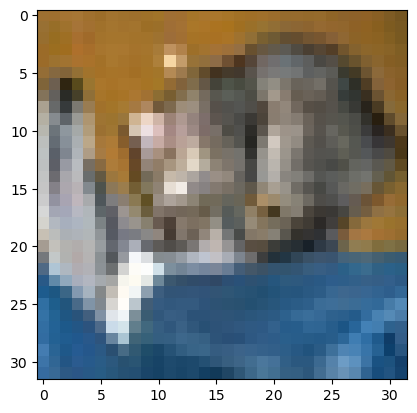

In [102]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import torchvision
import torchvision.transforms as transforms

# Pobierz dane CIFAR10
transform = transforms.Compose([transforms.ToTensor()])
cifar10 = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Pobierz pierwszy obrazek i etykietę
np_image, label = cifar10[0]

# Sprawdź typ i kształt np_image
print(f"Typ np_image: {type(np_image)}")
print(f"Kształt np_image: {np_image.shape}")

# Konwersja obrazu do NumPy, jeśli chcesz go używać jako np_array
np_image = np_image.numpy()

# Zmieniamy tensor z (C, H, W) na (H, W, C) do wyświetlania
plt.imshow(np_image.transpose(1, 2, 0))  # Zamiana (C, H, W) na (H, W, C)
plt.show()

# Ponowna konwersja obrazu z NumPy do PyTorch
image = torch.tensor(np_image)

# Przygotowanie parametrów do testu
kernel_sizes = [2, 3, 4]
paddings = [0, 1]
strides = [1, 2, 3, 4]

# Testowanie wszystkich kombinacji
for kernel_size, stride, padding in product(kernel_sizes, strides, paddings):
    # Twoja implementacja max pooling
    out = max_pooling(image, kernel_size=kernel_size, stride=stride, padding=padding)
    
    # Równoważna operacja w PyTorch
    out_torch = torch.nn.functional.max_pool2d(
        input=image.unsqueeze(0), kernel_size=kernel_size, padding=padding, stride=stride
    )
    
    # Porównanie wyników
    assert out_torch.squeeze().shape == out.shape
    assert torch.allclose(out, out_torch.squeeze(), atol=1e-5, rtol=1e-5)



# Trenowanie sieci kowolucyjnych

**Uwaga:** Poniższa część notebooka jest stworzona z myślą o uruchamianiu go w [Colaboratory](https://colab.research.google.com/) (link do przeglądania repozytoriów w colabie: [link](https://colab.research.google.com/github/)), oznacza to, że przygotowane zadania zakładają uczenie modelu z użyciem GPU. Na zajęciach zostanie krótko omówione używanie Colaboratory. Na własną odpowiedzialność można używać własnego komputera do rozwiązania pracy domowej.

In [48]:
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.transforms import (RandomVerticalFlip, ToTensor)

### CIFAR10
[CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) to dataset zawierający 60 tysięcy kolorowych obrazków rozmiaru 32 $\times$ 32 pikseli należących do 10 różnych klas. Poniżej przykładowe wizualizacje.

100%|██████████| 170M/170M [00:15<00:00, 11.2MB/s] 


Extracting .\cifar-10-python.tar.gz to .
CIFAR10 classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


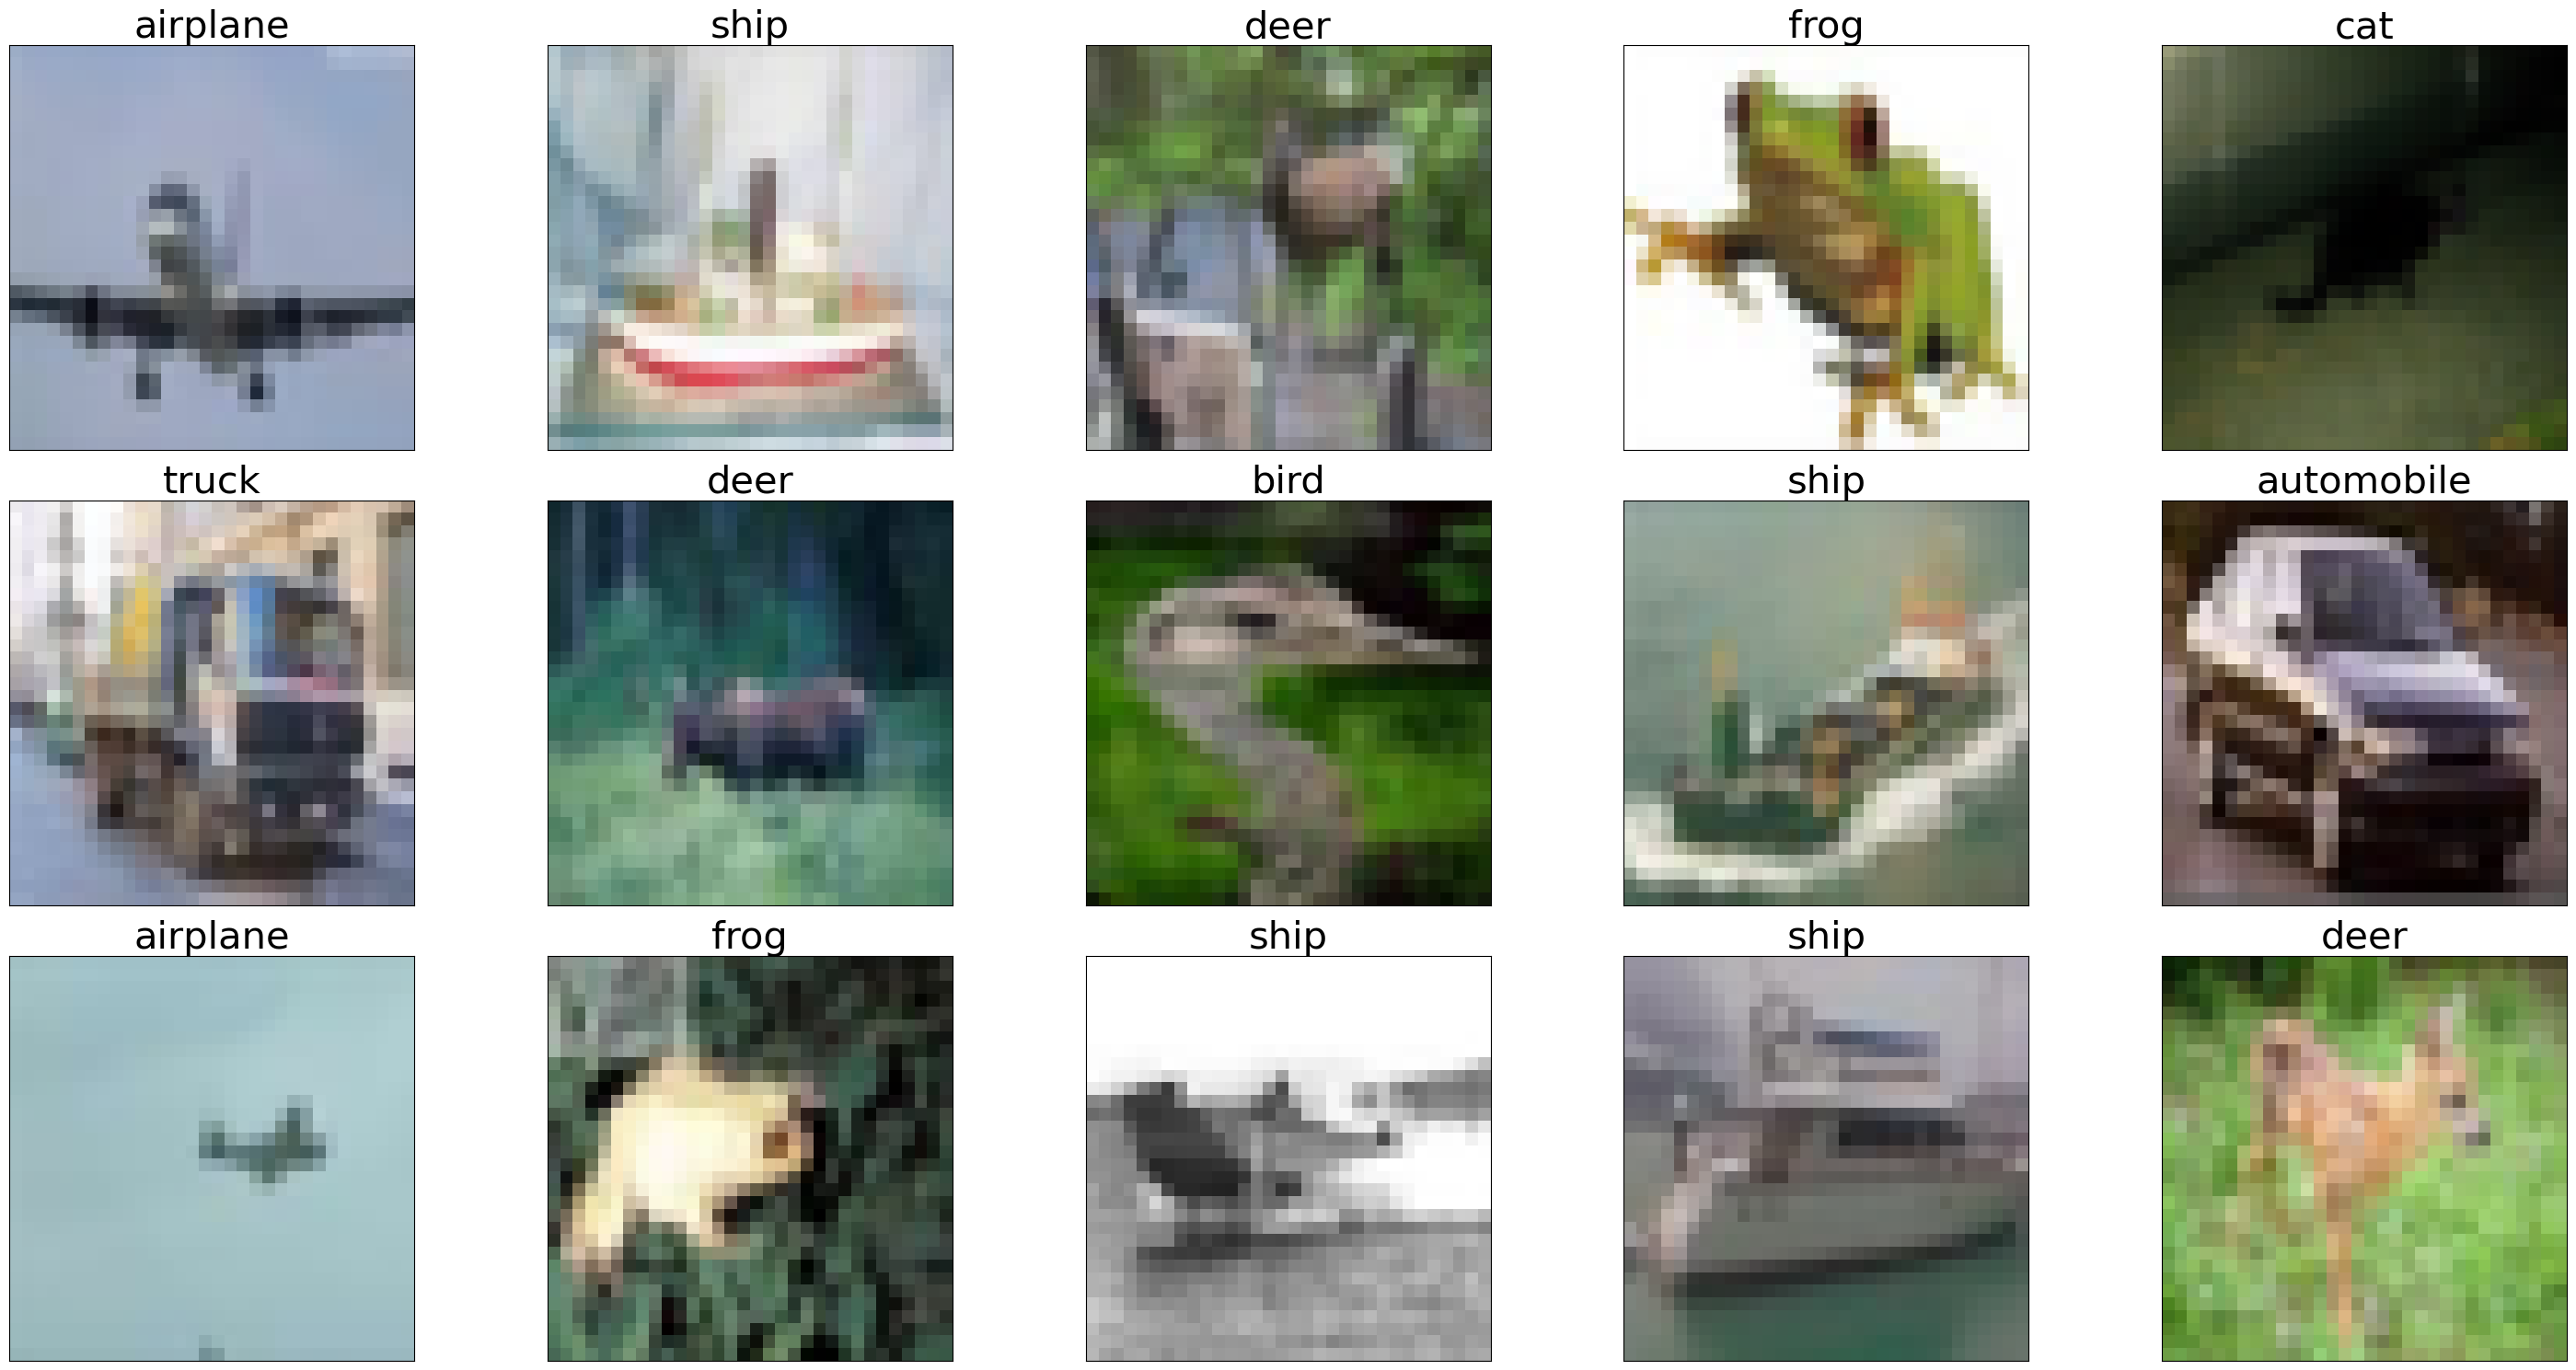

In [50]:
dataset = CIFAR10(root=".", train=True, transform=ToTensor(), download=True)
loader = DataLoader(dataset, batch_size=15, shuffle=True)

# get a single batch
for x, y in loader:
    break

# prepare visualisations
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 15))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ind = 5 * i + j
        ax.imshow(np.transpose(x[ind], (1, 2, 0)))
        ax.set_title(f"{dataset.classes[y[ind]]}", fontdict={"size": 30})
        ax.set_xticks([])
        ax.set_yticks([])

fig.tight_layout()

print(f"CIFAR10 classes: {dataset.classes}")

### Zadanie 3. Sieć Konwolucyjna na CIFAR10 (4 pkt.)

Zadaniem jest zaimplementowanie "od zera" sieci konwolucyjnej do klasyfikacji wieloklasowej na zbiorze CIFAR10. Należy zaimplementować zarówno model jak i pętle uczenia oraz ewaluacji. Twój kod powinien raportować *loss* w trakcie trenowania, testowania oraz *accuracy* na zbiorze testowym (opcjonalnie również na treningowym). Na koniec *accuracy* powinno osiągnąć wynik powyżej 75% na zbiorze testowym. Można korzystać z dowolnych mechanizmów dostępnych w PyTorchu.

Porady do zadania:

* Zwiększenie treningowego *batch size* może przyspieszyć uczenie, ale należy pamiętać, że, tak jak każdy hiperparametr, *batch_size* ma wpływ na proces uczenia.
* Przy dobieraniu architektury bądź hiperparametrów nie testować dłużej niż kilka epok (około 5), tak aby mieć szybki feedback. Dopiero po dobraniu powyższych rzeczy puścić dłuższe uczenie. Warto przy okazji wizualizować krzywe uczenia (funkcji kosztu) aby zwrócić uwagę na to kiedy koszt zaczyna się "wypłaszczać" i czy model przypadkowo nie overfituje (patrząc na wartości kosztu na zbiorze testowym)
* Dodatkowe (nadobowiązkowe) rzeczy do poprawienia wyniku: LR Schedule, Early Stopping.

Files already downloaded and verified
Files already downloaded and verified


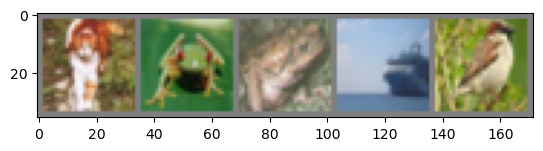

Labels: cat   frog  frog  ship  bird 


In [68]:
# tutaj zdefiniuj swój model, nimport torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Przygotowanie transformacji
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizacja
])

# Załaduj dane CIFAR10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=1000, shuffle=False)

# Zdefiniowanie klas w CIFAR10
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

dataiter = iter(trainloader)  # Tworzymy iterator z DataLoader
images, labels = next(dataiter)  # Pobieramy pierwszą paczkę z iteratora

# Funkcja wizualizacji obrazów
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images[:5]))  # Wizualizujemy 5 pierwszych obrazów
print('Labels:', ' '.join(f'{classes[labels[j]]:5s}' for j in range(5)))

In [ ]:
# tutaj uzupełnij ładowanie danych treningowych i testowych

train_dataset = CIFAR10(root='.', 
                        train=True,
                        download=True,
                        transform=???)

test_dataset = CIFAR10(root='.', 
                       train=False,
                       download=True,
                       transform=???)


train_loader = DataLoader(train_dataset, batch_size=???, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=5000, shuffle=False, num_workers=4)

In [ ]:
# tutaj zaimplementuj pętle uczenia ze wszystkimi potrzebnymi hiperparametrami


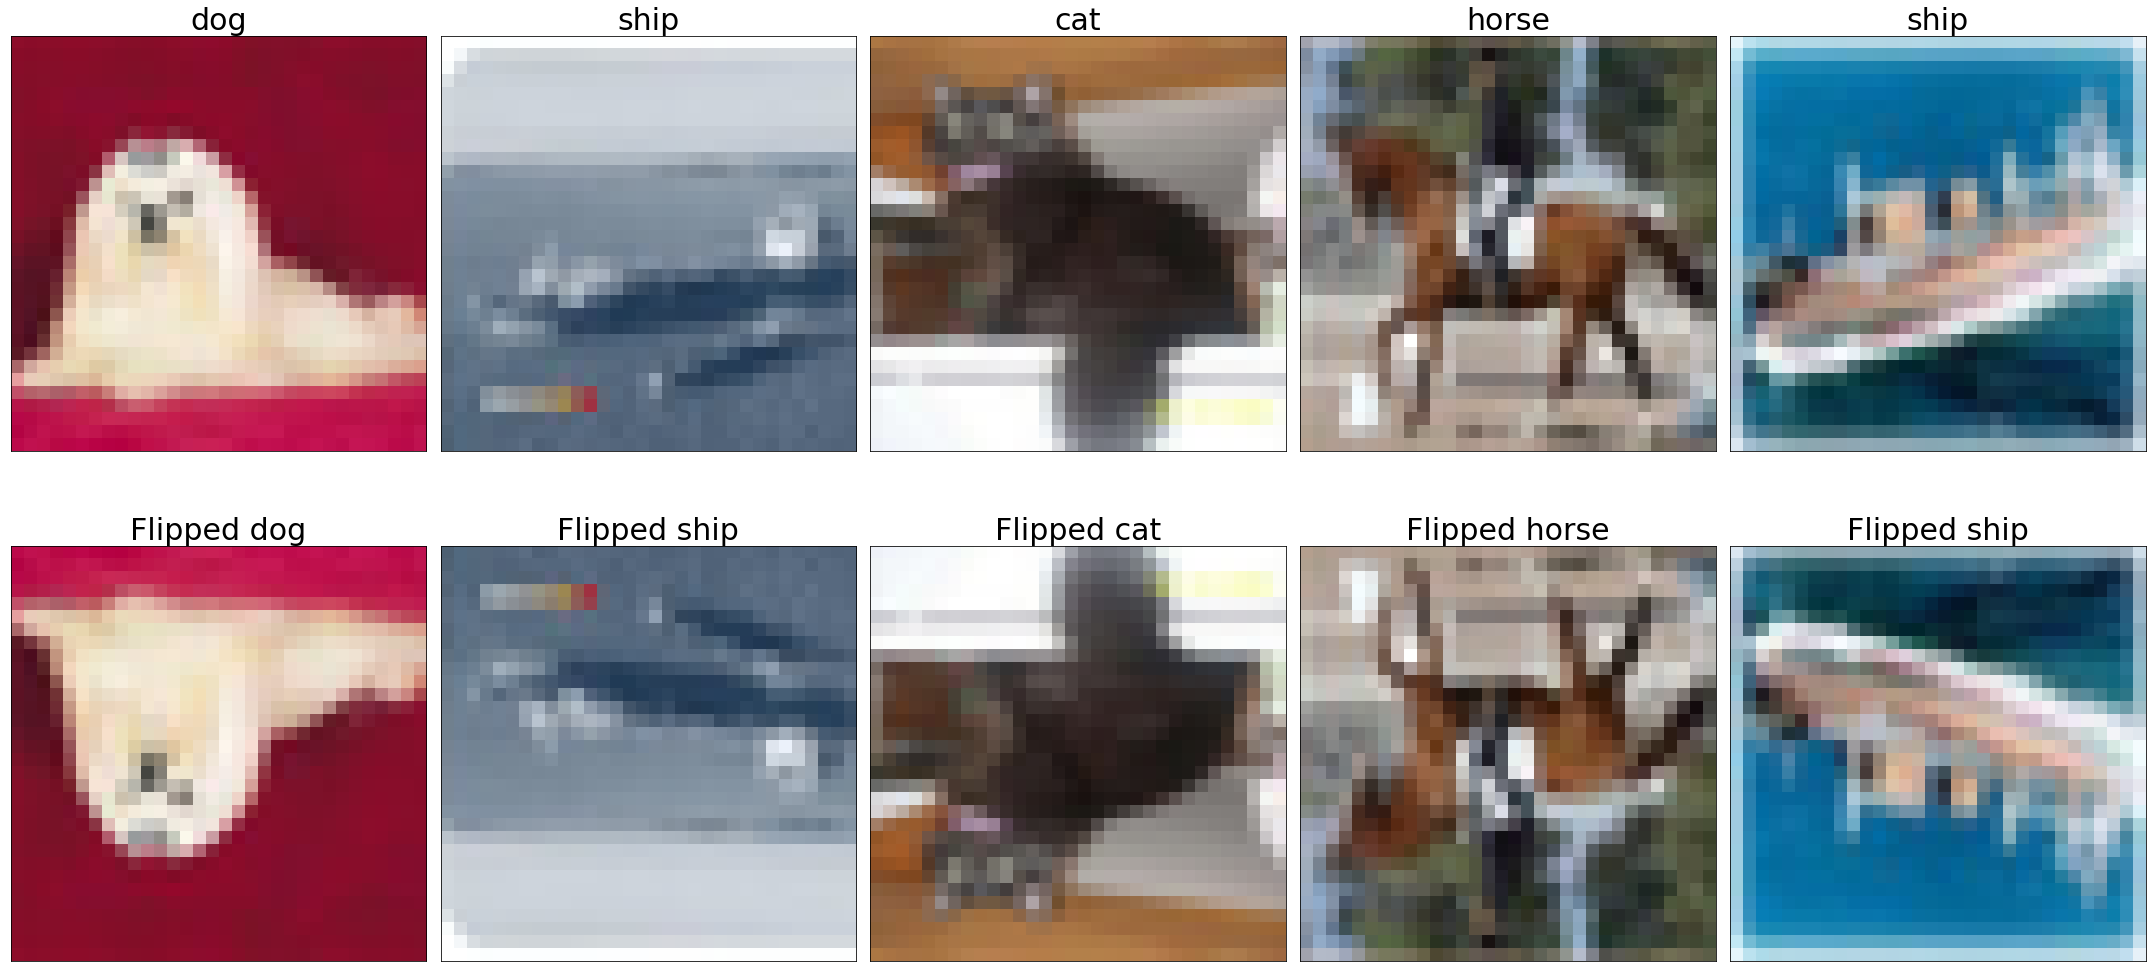

In [ ]:
# load test set
dataset = CIFAR10(root=".", train=True, transform=ToTensor())
loader = DataLoader(dataset, batch_size=15, shuffle=True)

# prepare a random flip
flip = RandomVerticalFlip(p=1)

# load some data
for x, y in loader:
    break


# visualise the flipping
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 15))

for img, label, ax in zip(x, y, axes[0]):
    ax.imshow(np.transpose(img, (1, 2, 0)))
    ax.set_title(f"{dataset.classes[label]}", fontdict={"size": 30})
    ax.set_xticks([])
    ax.set_yticks([])

for img, label, ax in zip(x, y, axes[1]):
    ax.imshow(np.transpose(flip(img), (1, 2, 0)))
    ax.set_title(f"Flipped {dataset.classes[label]}", fontdict={"size": 30})
    ax.set_xticks([])
    ax.set_yticks([])


fig.tight_layout()

### Zadanie 4. Augmentacja danych (1 pkt.)

Używając funkcjonalności dostępnych w [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) dodaj augmentacje danych do datasetu treningowego, zobacz o ile poprawia to wynik twojego modelu z poprzedniego zadania. W razie wątpliwości najlepiej przeszukać internet w poszukiwaniu typowych augmentacji dla CIFAR10.

In [80]:
# tutaj dodaj wybrane augumentcje danych treningowych i załaduj testowe

train_dataset = CIFAR10(root='.', 
                        train=True,
                        download=True
                        transform=???)

test_dataset = CIFAR10(root='.', 
                       train=False,
                       download=True
                       transform=???)


train_loader = DataLoader(train_dataset, batch_size=???, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=5000, shuffle=False, num_workers=4)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (169985709.py, line 5)

In [82]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# Definicja augmentacji danych
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),    # Losowe odbicie lustrzane
    transforms.RandomRotation(20),        # Losowy obrót o maksymalnie 20 stopni
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),  # Losowe przycinanie i skalowanie
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Zmiana jasności/kontrastu
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizacja
])

# Testowy zbiór bez augmentacji
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizacja
])

# Załaduj dane
train_dataset = CIFAR10(root='.', train=True, download=True, transform=transform_train)
test_dataset = CIFAR10(root='.', train=False, download=True, transform=transform_test)

# Ustaw DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=5000, shuffle=False, num_workers=4)


Files already downloaded and verified
Files already downloaded and verified
